In [1]:
import pandas as pd
import numpy as np
import acquire
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('figure', figsize=(14,8))

In [3]:
df = acquire.get_clean_data()

In [4]:
df = df.sort_index()
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217


In [5]:
df['sales_total'] = df.sale_amount * df.item_price

In [6]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,125.55


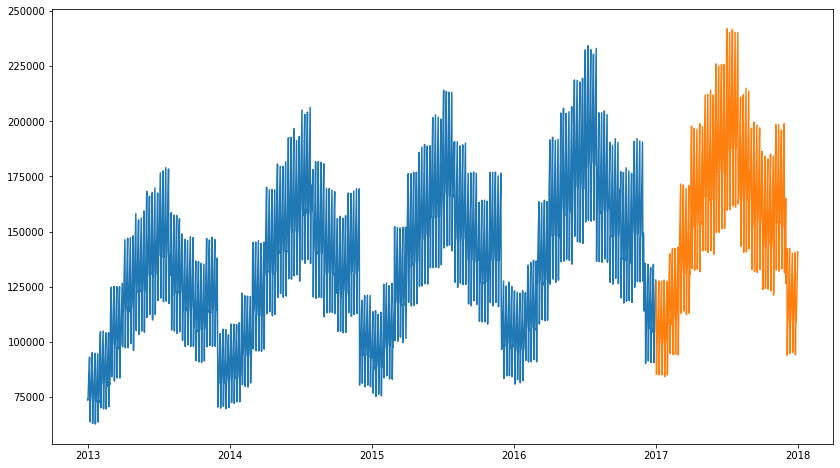

In [7]:
train = df[:'2016'].sales_total.resample('D').sum()
test = df['2017':].sales_total.resample('D').sum()

plt.plot(train.index, train)
plt.plot(test.index, test)

Clear seasonality displayed for summer and winter months

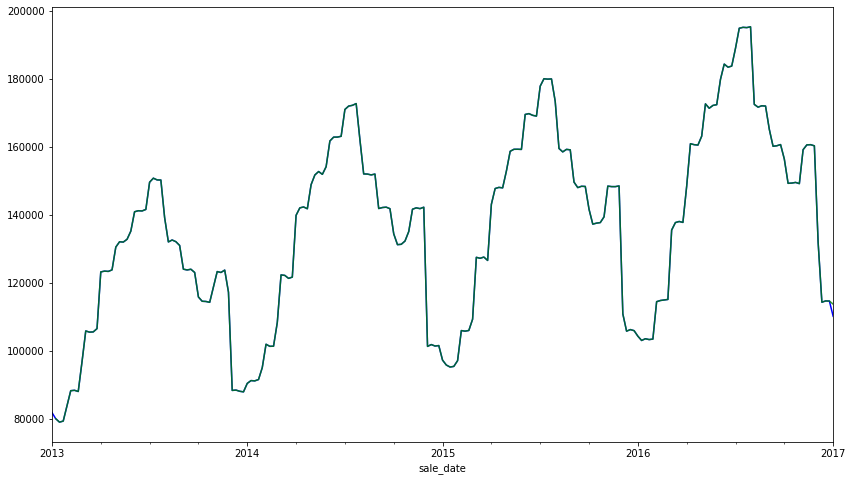

In [8]:
train.resample('W').mean().plot(color='blue')
train.rolling(7).mean().plot(alpha=.8,color='green')

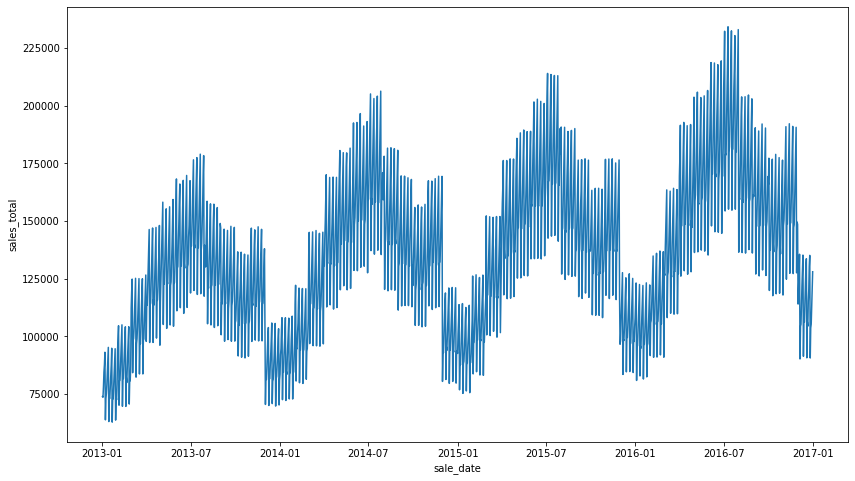

In [9]:
train = pd.DataFrame(train)
train['diff'] = train.diff(1)
sns.lineplot(x=train.index, y=train.sales_total, data=train)

Time series decomposition

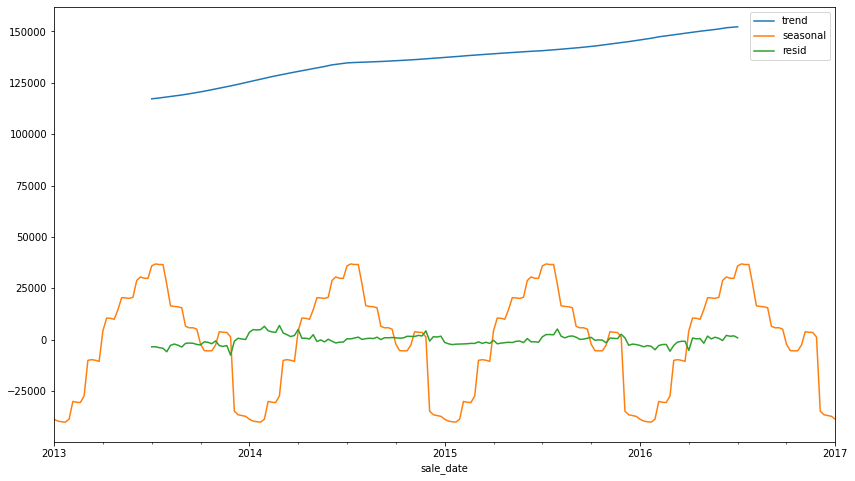

In [10]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

Very low residuals indicate low noise or randomness, also note mild upward trend

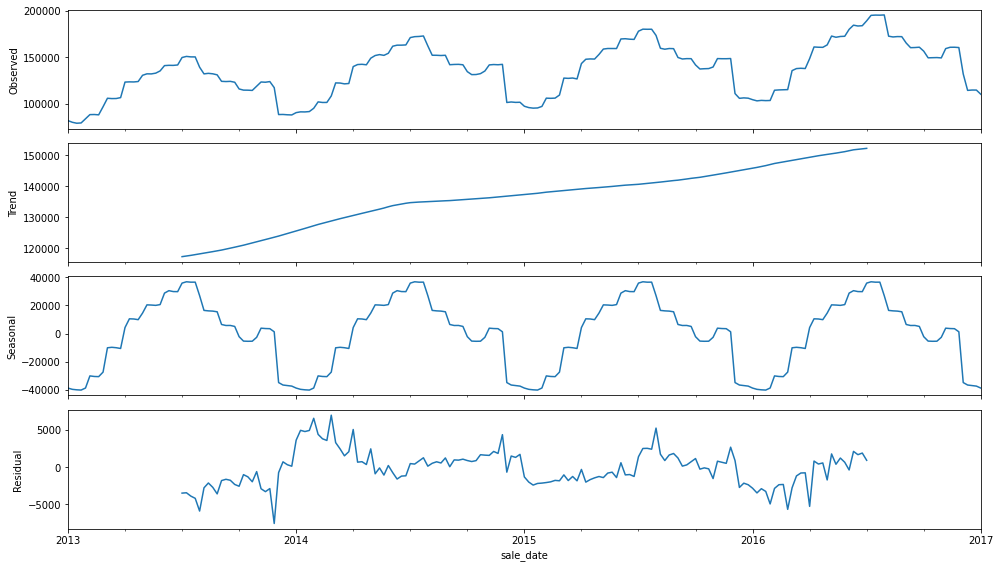

In [11]:
result.plot()
None

In [19]:
train

,sales_total,diff
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
...,...,...
2016-12-27 00:00:00+00:00,103657.89,13056.99
2016-12-28 00:00:00+00:00,105313.94,1656.05
2016-12-29 00:00:00+00:00,113221.85,7907.91


In [33]:
train['day'] = train.index.dayofweek
train

,sales_total,diff,day
sale_date,,,
2013-01-01 00:00:00+00:00,73844.01,NaN,1
2013-01-02 00:00:00+00:00,73570.58,-273.43,2
2013-01-03 00:00:00+00:00,78169.48,4598.90,3
2013-01-04 00:00:00+00:00,84467.73,6298.25,4
2013-01-05 00:00:00+00:00,87621.85,3154.12,5
...,...,...,...
2016-12-27 00:00:00+00:00,103657.89,13056.99,1
2016-12-28 00:00:00+00:00,105313.94,1656.05,2
2016-12-29 00:00:00+00:00,113221.85,7907.91,3


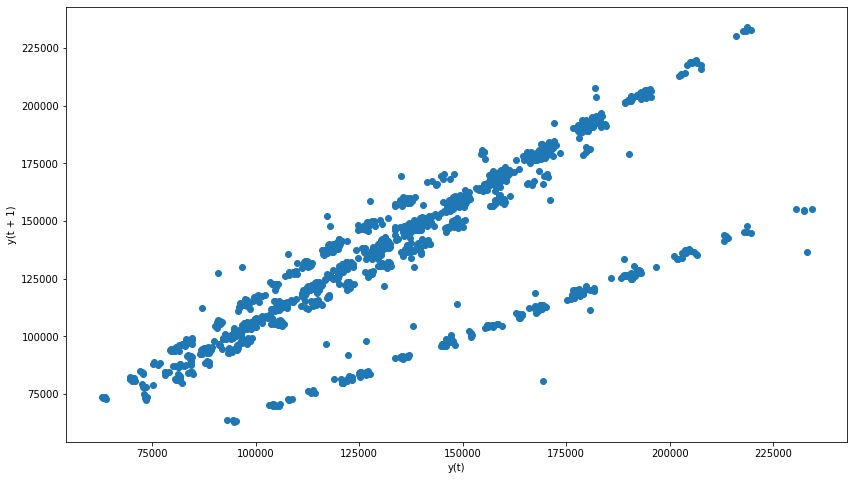

In [37]:
pd.plotting.lag_plot(train.sales_total, lag=1, label=train.day)

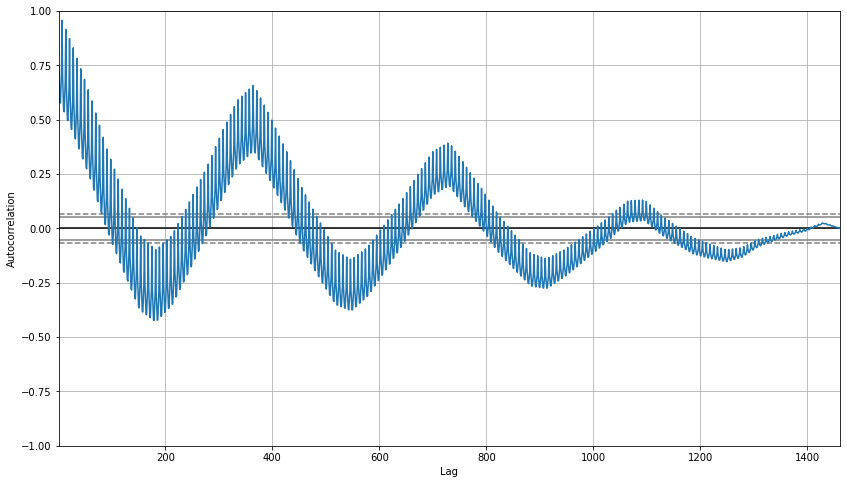

In [13]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('D').mean())

In [14]:
ddddddd

NameError: name 'ddddddd' is not defined

In [ ]:
df = acquire.get_power_data()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

In [ ]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] 
test = df[test_start_index:]

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [ ]:
train.Consumption.resample('W').mean().plot(color='red')
train.Consumption.rolling(7).mean().plot(alpha=.5,color='blue')

In [ ]:
train.groupby(train.index.month).Consumption.mean().plot()

In [ ]:
train['diff'] = train.Consumption.diff(1)
sns.lineplot(x=train.index, y='Consumption', data=train)

In [ ]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

In [ ]:
result.plot()
None